# sklearn
* 파이썬 기반 쉽고 효율적인 머신러닝 라이브러리 제공
* 머신러닝을 위한 다양한 알고리즘 제공
* 데이터셋, 데이터전처리, 지도/비지도학습, 모델 선택/평가 등을 위한 모듈 제공
* scikit-learn.org

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### scikit-learn에서 제공하는 데이터셋 확인
+ load : 내장된 데이터셋 불러옴
+ fetch : 인터넷을 통해 내려받는 대량 데이터
+ make : 확률분포에 근거해서 생성하는 가상 데이터

In [3]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits

In [5]:
iris = load_iris()
boston = load_boston() # 곧 삭제 예정 경고
digits = load_digits()

In [6]:
# 데이터셋 속성 : 객체.DESCR
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 데이터
양적
+ feature : 객체.data
+ feature name : 객체.feature_names

정답
+ target : 객체.target
+ target name : 객체.target_names

## iris

In [8]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## digits

In [23]:
digits.images[:1] # 픽셀정보를 기반으로 이미지처럼 출력

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]])

In [35]:
digits.target[:1]

array([0])

In [26]:
digits.data.shape  # 데이터 개수

(1797, 64)

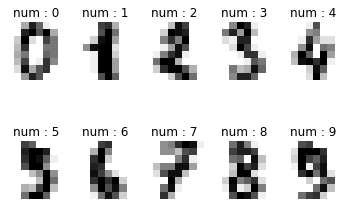

In [32]:
# 이미지 데이터 + 레이블 -> 리스트 저장
imglbl = list(zip(digits.images, digits.target))


for ix, (img, lbl) in enumerate(imglbl[:10]):
    plt.subplot(2, 5, ix+1)
    plt.axis(False)
    plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray_r)
    plt.title(f'num : {lbl}')

### 인터넷으로 내려받은 데이터셋 확인

In [33]:
import PIL
from sklearn.datasets import fetch_lfw_people

In [34]:
people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)

In [38]:
print(people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

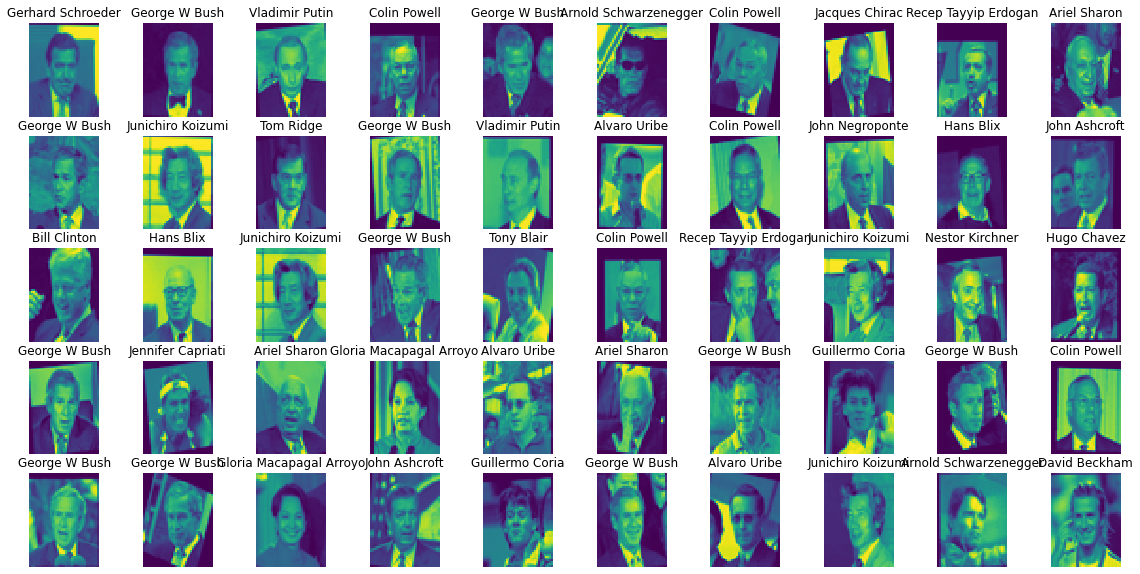

In [46]:
# 이미지 데이터 + 레이블 -> 리스트 저장
imglbl = list(zip(people.images, people.target))

plt.figure(figsize=(20,10))
for ix, (img, lbl) in enumerate(imglbl[:50]):
    plt.subplot(5, 10, ix+1)
    plt.axis(False)
    plt.imshow(img, interpolation='nearest')
    plt.title(f'{people.target_names[lbl]}')

In [48]:
people2 = fetch_lfw_people(min_faces_per_person=25, color=True)

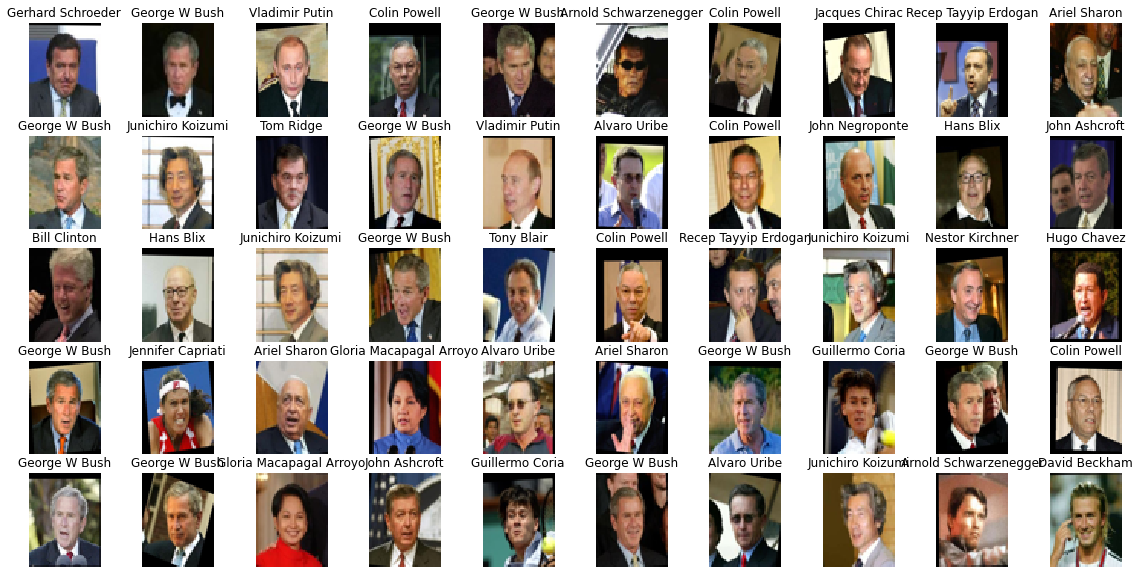

In [49]:
# 이미지 데이터 + 레이블 -> 리스트 저장
imglbl = list(zip(people2.images, people2.target))

plt.figure(figsize=(20,10))
for ix, (img, lbl) in enumerate(imglbl[:50]):
    plt.subplot(5, 10, ix+1)
    plt.axis(False)
    plt.imshow(img, interpolation='nearest')
    plt.title(f'{people2.target_names[lbl]}')

# 가상데이터 생성 : make_classification

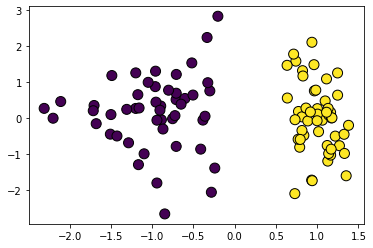

In [53]:
from sklearn.datasets import make_classification

# n_features : 독립변수 수, 기본 20
# n_informative : 독립변수와 종속변수간 상관관계수
# n_redundant=0 : 독립변수와 종속변수간 선형관계수
# n_clusters_per_class : 군집수
# random_state : 난수생성 시드값
# n_samples : 표본수, 기본 100

X, y = make_classification(n_features=2 ,n_informative=1,
                          n_redundant=0, n_clusters_per_class=1,
                          random_state=2007281430)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k')

# make_blobs

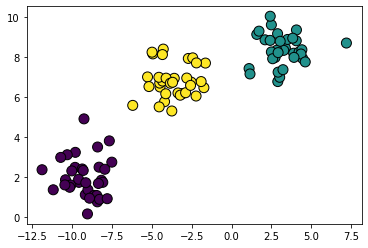

In [56]:
from sklearn.datasets import make_blobs
# 가우시안 정규분포를 이용해서 군집용 가상데이터 생성
# centers = 생성할 군집수, 기본 3

X, y = make_blobs(n_features=2, centers=3,
                 random_state=2208231500)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k')

# make_moon


# make_circle